In [ ]:
%pylab inline
from pywsi.segmentation import gmm_thresholding, label_nuclei
from skimage.io import imread
import joblib
import seaborn as sns
import pandas as pd
sns.set_context('talk', font_scale=1.5)
sns.set_style('white')


In [4]:
train_df = pd.read_table('/Z/personal-folders/interns/saket/github/pywsi/data/patch_df/train_df_with_mask.tsv')
valid_df = pd.read_table('/Z/personal-folders/interns/saket/github/pywsi/data/patch_df/validate_df_with_mask.tsv')


In [5]:
train_df.head()

,is_tissue,is_tumor,json_filepath,slide_path,slide_type,tile_loc,uid,img_path,mask_path
0,True,False,NaN,/Z/personal-folders/interns/saket/histopath_da...,normal,"(572, 18)",normal_027,/Z/personal-folders/interns/saket/github/pywsi...,/Z/personal-folders/interns/saket/github/pywsi...
1,True,True,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,tumor,"(599, 120)",tumor_047,/Z/personal-folders/interns/saket/github/pywsi...,/Z/personal-folders/interns/saket/github/pywsi...
2,True,False,NaN,/Z/personal-folders/interns/saket/histopath_da...,normal,"(630, 233)",normal_055,/Z/personal-folders/interns/saket/github/pywsi...,/Z/personal-folders/interns/saket/github/pywsi...
3,True,False,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,tumor,"(630, 346)",tumor_006,/Z/personal-folders/interns/saket/github/pywsi...,/Z/personal-folders/interns/saket/github/pywsi...
4,True,True,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,tumor,"(237, 122)",tumor_076,/Z/personal-folders/interns/saket/github/pywsi...,/Z/personal-folders/interns/saket/github/pywsi...


In [7]:
tumor_path = train_df.iloc[1]['img_path']
normal_path = train_df.iloc[2]['img_path']

normal_rgb = joblib.load(normal_path)
tumor_rgb = joblib.load(tumor_path)


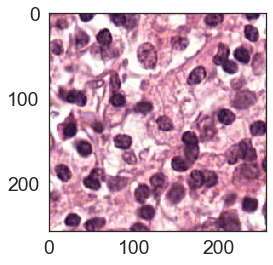

In [8]:
plt.imshow(normal_rgb)

/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid alia

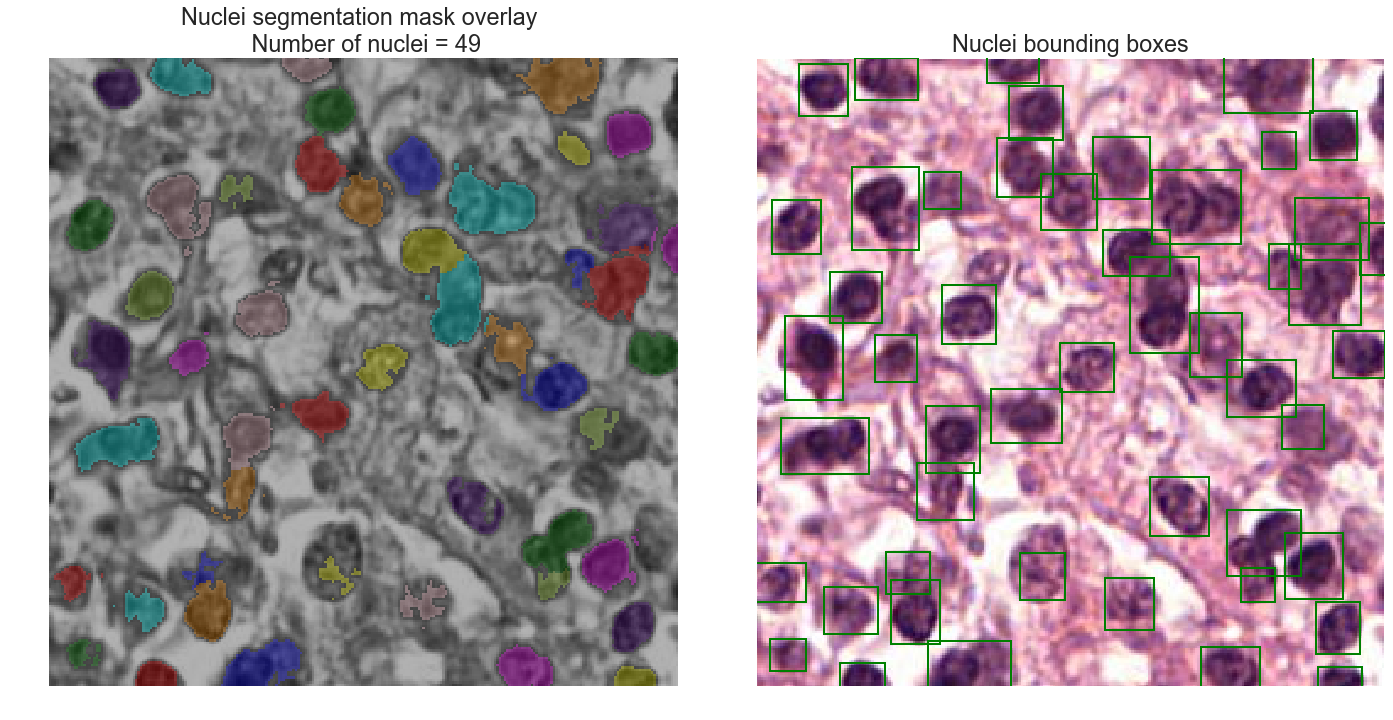

In [10]:
region_properties = {}
fg_mask = {}
#fig, ax = plt.subplots(figsize=(8,8))

region_properties['normal'], fg_mask['normal'] = label_nuclei(normal_rgb,
                                                              local_max_search_radius=5, 
                                                              min_radius=3, 
                                                              max_radius=5,
                                                              min_nucleus_area=80)


/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid alia

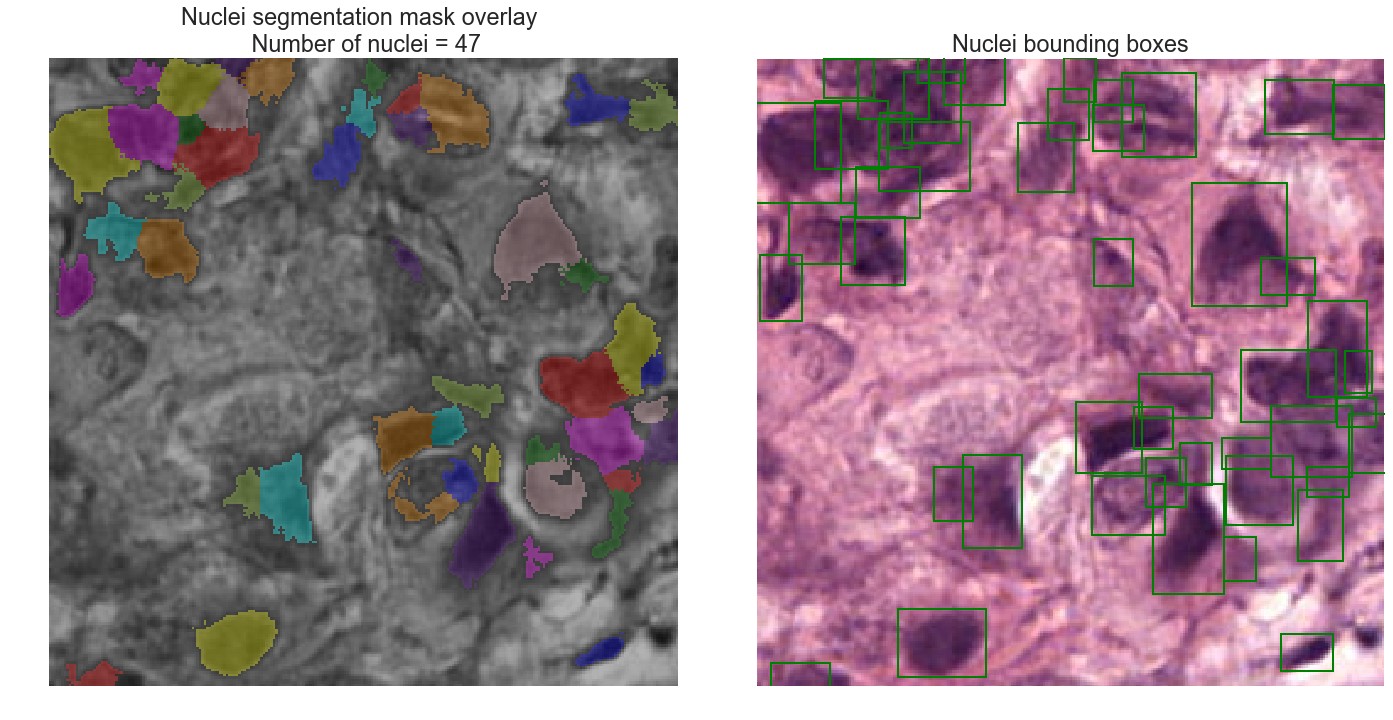

In [15]:
region_properties['tumor'], fg_mask['tumor'] = label_nuclei(tumor_rgb,
                                                              local_max_search_radius=3, 
                                                              min_radius=3, 
                                                              max_radius=5,
                                                              min_nucleus_area=80)